In [1]:
%matplotlib inline

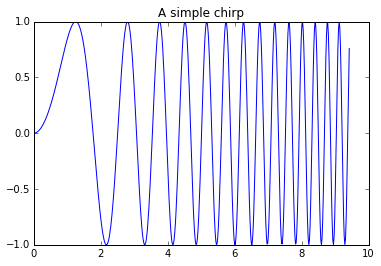

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title("A simple chirp")

In [4]:
import nltk
from nltk.corpus import brown

def performance(cfd, wordlist):
    print("Computing performance for size %s" % (len(wordlist)))
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

Computing performance for size 1
Computing performance for size 2
Computing performance for size 4
Computing performance for size 8
Computing performance for size 16
Computing performance for size 32
Computing performance for size 64
Computing performance for size 128
Computing performance for size 256
Computing performance for size 512
Computing performance for size 1024
Computing performance for size 2048
Computing performance for size 4096
Computing performance for size 8192
Computing performance for size 14394


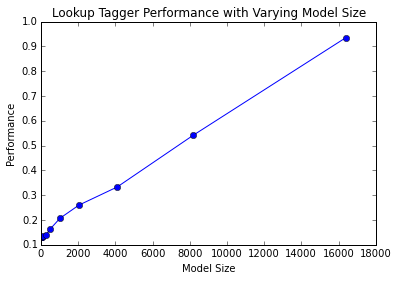

In [5]:
display()